# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [3]:
df = pd.read_csv('appl_1980_2014.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 3. Assign it to a variable apple

### Step 4.  Check out the type of the columns

In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [13]:
df.set_index(df.Date, inplace = True)
df.drop('Date', inplace = True, axis = 1)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [23]:
df[df.groupby(df.index).count() > 1].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-07,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-03,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-01,NaN,NaN,NaN,NaN,NaN,NaN


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [26]:
df.sort_index().head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [32]:
df.resample('B')

DatetimeIndexResampler [freq=<BusinessDay>, axis=0, closed=left, label=left, convention=start, base=0]

### Step 10.  What is the difference in days between the first day and the oldest

In [27]:
df.index[-1] - df.index[0]

Timedelta('-12261 days +00:00:00')

### Step 11.  How many months in the data we have?

In [29]:
len(df.index.month)

8465

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

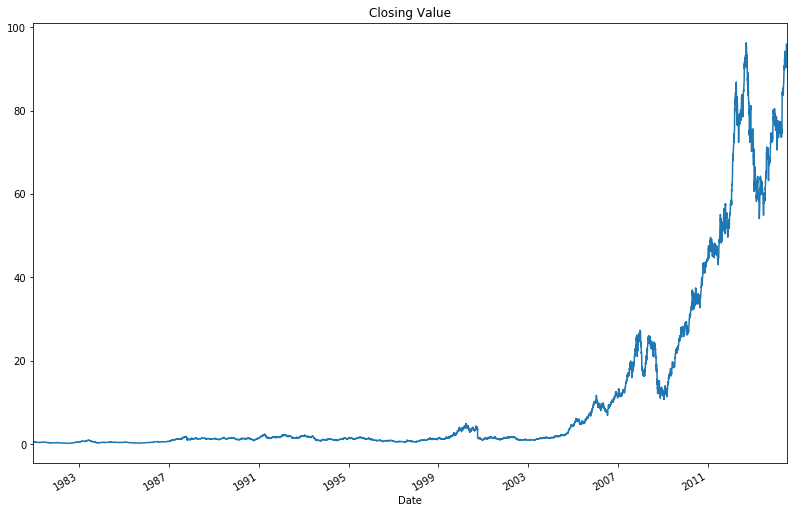

In [34]:
plt.figure(figsize= (13.5, 9))
df['Adj Close'].plot(kind = 'line')
plt.title('Closing Value')

### BONUS: Create your own question and answer it.